# Google Playstore Case Study

In this module you’ll be learning data visualisation with the help of a case study. This will enable you to understand how visualisation aids you in solving business problems. 

**Problem Statement**

The team at Google Play Store wants to develop a feature that would enable them to boost visibility for the most promising apps. Now, this analysis would require a preliminary understanding of the features that define a well-performing app. You can ask questions like:
- Does a higher size or price necessarily mean that an app would perform better than the other apps? 
- Or does a higher number of installs give a clear picture of which app would have a better rating than others?




### Session 1 - Introduction to Data Visualisation

In [425]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [426]:
#read the dataset and check the first five rows
inp0 = pd.read_csv('googleplaystore_v2.csv')
inp0.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [427]:
#Check the shape of the dataframe
inp0.shape

(10841, 13)

### Data Handling and Cleaning

The first few steps involve making sure that there are no __missing values__ or __incorrect data types__ before we proceed to the analysis stage. These aforementioned problems are handled as follows:

 - For Missing Values: Some common techniques to treat this issue are
    - Dropping the rows containing the missing values
    - Imputing the missing values
    - Keep the missing values if they don't affect the analysis
 
    
 - Incorrect Data Types:
    - Clean certain values 
    - Clean and convert an entire column
 

In [428]:
#Check the datatypes of all the columns of the dataframe
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


#### Missing Value Treatment

In [429]:
#Check the number of null values in the columns
inp0.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Handling missing values for rating
 - Ratings is the target variable
 - drop the records

In [430]:
#Drop the rows having null values in the Rating field
inp1 = inp0.dropna(subset=['Rating'])

#Check the shape of the dataframe
inp1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9367 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9367 non-null   object 
 1   Category        9367 non-null   object 
 2   Rating          9367 non-null   float64
 3   Reviews         9367 non-null   object 
 4   Size            9367 non-null   float64
 5   Installs        9367 non-null   object 
 6   Type            9367 non-null   object 
 7   Price           9367 non-null   object 
 8   Content Rating  9366 non-null   object 
 9   Genres          9367 non-null   object 
 10  Last Updated    9367 non-null   object 
 11  Current Ver     9363 non-null   object 
 12  Android Ver     9364 non-null   object 
dtypes: float64(2), object(11)
memory usage: 1.0+ MB


In [431]:
# Check the number of nulls in the Rating field again to cross-verify
inp1['Rating'].isnull().sum()

0

In [432]:
#Question
#Check the number of nulls in the dataframe again and find the total number of null values
inp1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       3
dtype: int64

In [433]:
#Inspect the nulls in the Android Version column
inp1[inp1['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.000000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.000000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [434]:
#Drop the row having shifted values
inp2 = inp1.drop(index=10472)
#Check the nulls againin Android version column to cross-verify
inp2.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       4
Android Ver       2
dtype: int64

Imputing Missing Values

- For numerical variables use mean and median
- For categorical variables use mode

In [435]:
#Check the most common value in the Android version column
mode_Android_ver = inp2['Android Ver'].mode()
mode_Android_ver

0    4.1 and up
Name: Android Ver, dtype: object

In [436]:
#Fill up the nulls in the Android Version column with the above value
inp2['Android Ver'] = inp2['Android Ver'].fillna(mode_Android_ver[0])

In [437]:
#Check the nulls in the Android version column again to cross-verify
inp2['Android Ver'].isnull().sum()

0

In [438]:
#Check the nulls in the entire dataframe again
inp2.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       4
Android Ver       0
dtype: int64

In [439]:
#Check the most common value in the Current version column
mode_Current_ver = inp2['Current Ver'].mode()
mode_Current_ver

0    Varies with device
Name: Current Ver, dtype: object

In [440]:
#Replace the nulls in the Current version column with the above value

inp2['Current Ver'] = inp2['Current Ver'].fillna(mode_Current_ver[0])

In [441]:
# Question : Check the most common value in the Current version column again
mode_Current_ver = inp2['Current Ver'].mode()
mode_Current_ver

0    Varies with device
Name: Current Ver, dtype: object

#### Handling Incorrect Data Types 

In [442]:
#Check the datatypes of all the columns 
inp2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   object 
 4   Size            9366 non-null   float64
 5   Installs        9366 non-null   object 
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   object 
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9366 non-null   object 
 12  Android Ver     9366 non-null   object 
dtypes: float64(2), object(11)
memory usage: 1.0+ MB


In [443]:
#Question - Try calculating the average price of all apps having the Android version as "4.1 and up" 
#avg_price = inp2['Price'].mean()


In [444]:
#Analyse the Price column to check the issue
# We cannot calculate the average price of all apps because the data type of Price column is object (string). 
# We just can calculate if all values are performed in the form of numeric.

In [445]:
#Write the function to make the changes
inp2['Price'] = inp2['Price'].apply(lambda x: x.replace('$',''))
inp2['Price'] = inp2['Price'].astype('float64')

In [446]:
#Verify the dtype of Price once again
inp2['Price'].dtype

dtype('float64')

In [447]:
#Analyse the Reviews column
# avg_review = inp2['Reviews'].mean()
# We cannot calculate the average the number of reviews of all apps because the data type of Reviews column is object (string). 
# We just can calculate if all values are performed in the form of numeric.
inp2['Reviews'].dtype

dtype('O')

In [448]:
#Change the dtype of this column
inp2['Reviews'] = inp2['Reviews'].astype('int64')


In [449]:
inp2['Reviews'].unique()

array([   159,    967,  87510, ...,    603,   1195, 398307], dtype=int64)

In [450]:
#Check the quantitative spread of this dataframe
inp2.describe()

,Rating,Reviews,Size,Price
count,9366.000000,9.366000e+03,9366.000000,9366.000000
mean,4.191757,5.140498e+05,22705.733753,0.960928
std,0.515219,3.144042e+06,21305.040123,15.816585
min,1.000000,1.000000e+00,8.500000,0.000000
25%,4.000000,1.862500e+02,6600.000000,0.000000
50%,4.300000,5.930500e+03,21000.000000,0.000000
75%,4.500000,8.153275e+04,27000.000000,0.000000
max,5.000000,7.815831e+07,100000.000000,400.000000


In [451]:
#Analyse the Installs Column
# We cannot check the quantitive spead of Intalls Column because the data type of this column is object(string). 
# Therefore, we need to change the data type of this column to facilitate the analysis process.
inp2['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '100+', '500+', '10+',
       '5+', '50+', '1+'], dtype=object)

In [452]:
#Question Clean the Installs Column and find the approximate number of apps at the 50th percentile.
inp2['Installs'] = inp2['Installs'].apply(lambda x: x.replace('+','').replace(',',''))
inp2['Installs'] = inp2['Installs'].astype('int64')


In [453]:
inp2['Installs'].unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,        100,        500,
               10,          5,         50,          1], dtype=int64)

In [454]:
inp2['Installs'].describe()

count    9.366000e+03
mean     1.789744e+07
std      9.123822e+07
min      1.000000e+00
25%      1.000000e+04
50%      5.000000e+05
75%      5.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

In [455]:
inp2['Installs'].median()

500000.0

#### Sanity Checks

The data that we have needs to make sense and therefore you can perform certain sanity checks on them to ensure they are factually correct as well. Some sanity checks can be:

- Rating is between 1 and 5 for all the apps.
- Number of Reviews is less than or equal to the number of Installs.
- Free Apps shouldn’t have a price greater than 0.


In [456]:
inp2['Rating'].describe()

count    9366.000000
mean        4.191757
std         0.515219
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

In [457]:
#Perform the sanity checks on the Reviews column
inp3 = inp2[inp2['Reviews'] <= inp2['Installs']]
inp3.shape

(9359, 13)

In [458]:
#perform the sanity checks on prices of free apps 
inp3['Price'] = inp3.apply(lambda x:  0 if x['Type'] == "Free" and x['Price'] != 0 else x['Price'],axis=1)


C:\Users\quynh\AppData\Local\Temp\ipykernel_14212\364228988.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inp3['Price'] = inp3.apply(lambda x:  0 if x['Type'] == "Free" and x['Price'] != 0 else x['Price'],axis=1)


#### Outliers Analysis Using Boxplot

Now you need to start identifying and removing extreme values or __outliers__ from our dataset. These values can tilt our analysis and often provide us with a biased perspective of the data available. This is where you’ll start utilising visualisation to achieve your tasks. And the best visualisation to use here would be the box plot. Boxplots are one of the best ways of analysing the spread of a numeric variable


Using a box plot you can identify the outliers as follows:

![BoxPlots to Identify Outliers](images\Boxplot.png)

- Outliers in data can arise due to genuine reasons or because of dubious entries. In the latter case, you should go ahead and remove such entries immediately. Use a boxplot to observe, analyse and remove them.
- In the former case, you should determine whether or not removing them would add value to your analysis procedure.

- You can create a box plot directly from pandas dataframe or the matplotlib way as you learnt in the previous session. Check out their official documentation here:
   - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html
   - https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.boxplot.html

In [459]:
#import the plotting libraries



In [460]:
inp3['Price'].describe()

count    9359.000000
mean        0.961116
std        15.822478
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: Price, dtype: float64

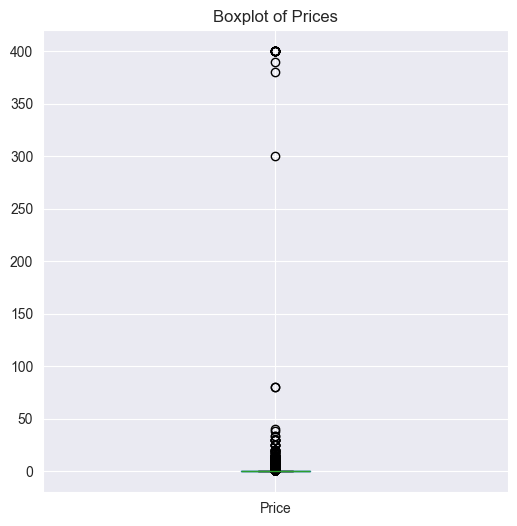

In [461]:
#Create a box plot for the price column
plt.figure(figsize=(6,6))
chart1 = inp3.boxplot(column='Price')
plt.title('Boxplot of Prices')
plt.show()


In [462]:
#Check the apps with price more than 200
inp3[inp3['Price'] > 200]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1500.0,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000.0,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300.0,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800.0,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8700.0,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2600.0,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4700.0,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2900.0,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22000.0,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,965.0,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


In [463]:
#Clean the Price column
inp4 = inp3[inp3['Price'] <= 200]
inp4

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.000000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.000000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.000000,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.000000,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.000000,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2600.000000,500,Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.000000,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.000000,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,21516.529524,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [464]:
inp4['Price'].describe()

count    9344.000000
mean        0.334463
std         2.169925
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        79.990000
Name: Price, dtype: float64

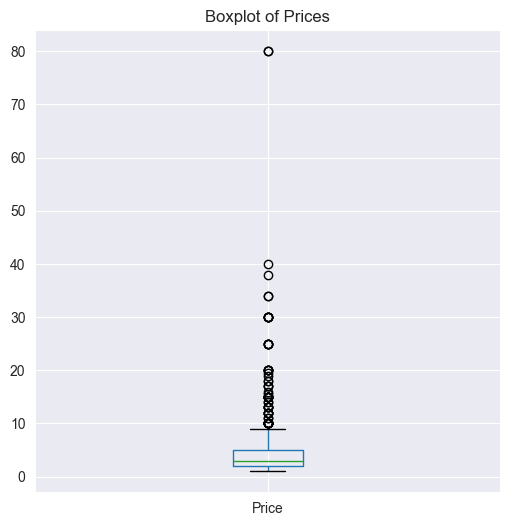

In [465]:
#Create a box plot for paid apps
inp5 = inp4[inp4['Type'] == 'Paid']
plt.figure(figsize=(6,6))
chart3 = inp5.boxplot(column='Price')
plt.title('Boxplot of Prices')
plt.show()


In [466]:
#Check the apps with price more than 30
inp5[inp5['Price'] > 30]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2253,Vargo Anesthesia Mega App,MEDICAL,4.6,92,32000.0,1000,Paid,79.99,Everyone,Medical,"June 18, 2018",19.0,4.0.3 and up
2301,A Manual of Acupuncture,MEDICAL,3.5,214,68000.0,1000,Paid,33.99,Everyone,Medical,"October 2, 2017",2.1.35,4.0 and up
2365,Vargo Anesthesia Mega App,MEDICAL,4.6,92,32000.0,1000,Paid,79.99,Everyone,Medical,"June 18, 2018",19.0,4.0.3 and up
2402,A Manual of Acupuncture,MEDICAL,3.5,214,68000.0,1000,Paid,33.99,Everyone,Medical,"October 2, 2017",2.1.35,4.0 and up
2414,LTC AS Legal,MEDICAL,4.0,6,1300.0,100,Paid,39.99,Everyone,Medical,"April 4, 2018",3.0.1,4.1 and up
5360,I am Rich Person,LIFESTYLE,4.2,134,1800.0,1000,Paid,37.99,Everyone,Lifestyle,"July 18, 2017",1.0,4.0.3 and up


In [467]:
#Clean the Price column again
inp5_cleaned = inp5[inp5['Price'] <= 30]

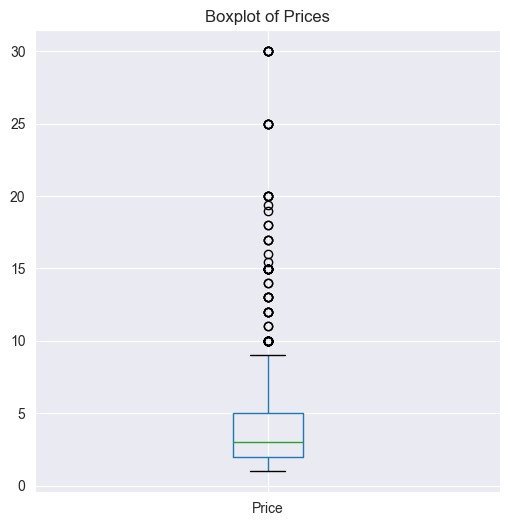

In [468]:
plt.figure(figsize=(6,6))
chart3 = inp5_cleaned.boxplot(column='Price')
plt.title('Boxplot of Prices')
plt.show()

In [469]:
inp5_cleaned['Price'].describe()

count    623.000000
mean       4.525329
std        4.766146
min        0.990000
25%        1.990000
50%        2.990000
75%        4.990000
max       29.990000
Name: Price, dtype: float64

### Histograms

Histograms can also be used in conjuction with boxplots for data cleaning and data handling purposes. You can use it to check the spread of a numeric variable. Histograms generally work by bucketing the entire range of values that a particular variable takes to specific __bins__. After that, it uses vertical bars to denote the total number of records in a specific bin, which is also known as its __frequency__.


![Histogram](images\Histogram.png)

You can adjust the number of bins to improve its granularity

![Bins change](images\Granular.png)

You'll be using plt.hist() to plot a histogram. Check out its official documentation:https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hist.html

<Figure size 1000x600 with 0 Axes>

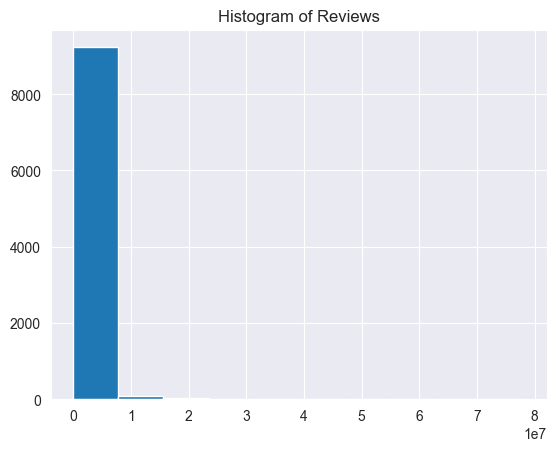

In [470]:
#Create a histogram of the Reviews
plt.figure(figsize=(10,6))
his1 = inp3.hist(column='Reviews')
plt.title('Histogram of Reviews')
plt.show()

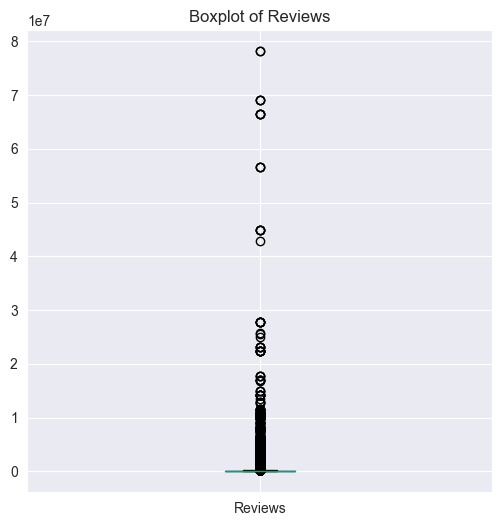

In [471]:
#Create a boxplot of the Reviews column
plt.figure(figsize=(6,6))
bp1 = inp3.boxplot(column='Reviews')
plt.title('Boxplot of Reviews')
plt.show()

In [472]:
#Check records with 1 million reviews
inp3[inp3['Reviews'] >= 1000000]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
139,Wattpad 📖 Free Books,BOOKS_AND_REFERENCE,4.6,2914724,21516.529524,100000000,Free,0.0,Teen,Books & Reference,"August 1, 2018",Varies with device,Varies with device
152,Google Play Books,BOOKS_AND_REFERENCE,3.9,1433233,21516.529524,1000000000,Free,0.0,Teen,Books & Reference,"August 3, 2018",Varies with device,Varies with device
189,Uber Driver,BUSINESS,4.4,1254730,21516.529524,10000000,Free,0.0,Everyone,Business,"August 3, 2018",Varies with device,Varies with device
194,OfficeSuite : Free Office + PDF Editor,BUSINESS,4.3,1002861,35000.000000,100000000,Free,0.0,Everyone,Business,"August 2, 2018",9.7.14188,4.1 and up
201,Facebook Pages Manager,BUSINESS,4.0,1279184,21516.529524,50000000,Free,0.0,Everyone,Business,"August 2, 2018",Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10190,Fallout Shelter,FAMILY,4.6,2721923,25000.000000,10000000,Free,0.0,Teen,Simulation,"June 11, 2018",1.13.12,4.1 and up
10200,Facebook Pages Manager,BUSINESS,4.0,1279800,21516.529524,50000000,Free,0.0,Everyone,Business,"August 6, 2018",Varies with device,Varies with device
10327,Garena Free Fire,GAME,4.5,5534114,53000.000000,100000000,Free,0.0,Teen,Action,"August 3, 2018",1.21.0,4.0.3 and up
10636,FRONTLINE COMMANDO,GAME,4.4,1351833,12000.000000,10000000,Free,0.0,Teen,Action,"October 28, 2013",3.0.3,2.1 and up


In [473]:
#Drop the above records
inp6 = inp3[inp3['Reviews'] < 1000000]
inp6.shape

(8655, 13)

<Figure size 1000x600 with 0 Axes>

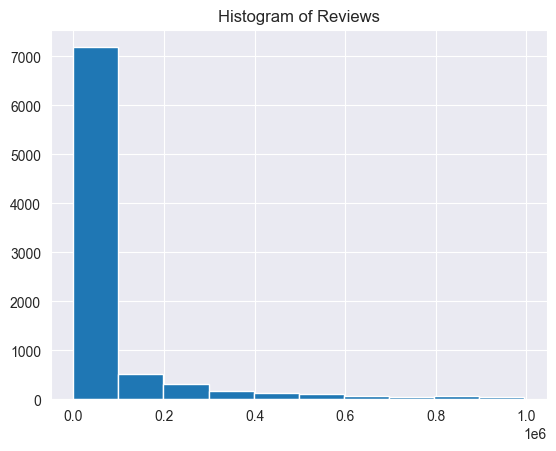

In [474]:
#Question - Create a histogram again and check the peaks
plt.figure(figsize=(10,6))
his2 = inp6.hist(column='Reviews')
plt.title('Histogram of Reviews')
plt.show()

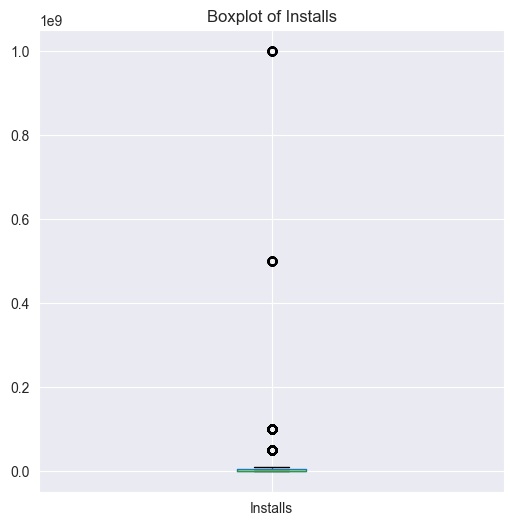

In [475]:
#Question - Create a box plot for the Installs column and report back the IQR
plt.figure(figsize=(6,6))
bp2 = inp3.boxplot(column='Installs')
plt.title('Boxplot of Installs')
plt.show()



In [476]:
inp3['Installs'].describe()

count    9.359000e+03
mean     1.791083e+07
std      9.127102e+07
min      5.000000e+00
25%      1.000000e+04
50%      5.000000e+05
75%      5.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

In [477]:
q75, q25 = np.percentile(inp3['Installs'], [75, 25])

In [478]:
IQR = q75-q25
IQR

4990000.0

In [479]:
#Question - CLean the Installs by removing all the apps having more than or equal to 100 million installs
inp7 = inp3[inp3['Installs'] < 100000000]

<Figure size 1000x600 with 0 Axes>

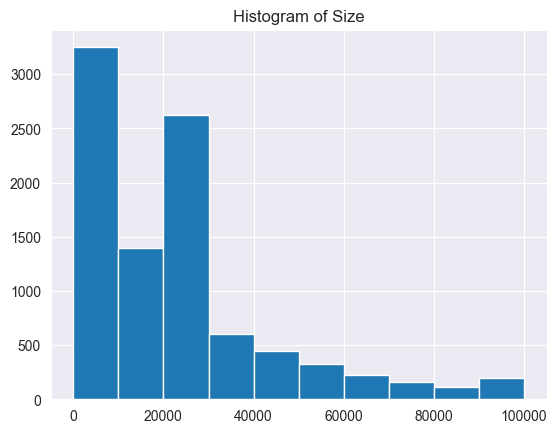

In [480]:
#Plot a histogram for Size as well.
plt.figure(figsize=(10,6))
his3 = inp3.hist(column='Size')
plt.title('Histogram of Size')
plt.show()

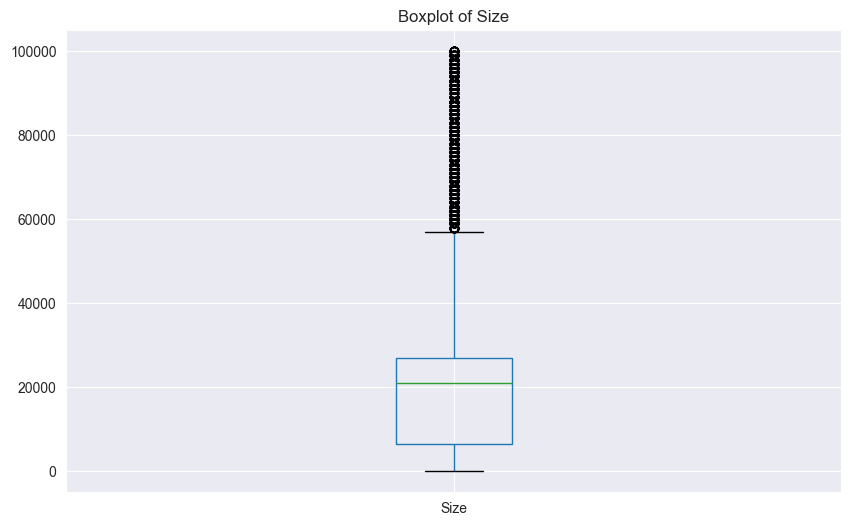

In [481]:
#Question - Create a boxplot for the Size column and report back the median value
plt.figure(figsize=(10,6))
bp3 = inp3.boxplot(column='Size')
plt.title('Boxplot of Size')
plt.show()

In [482]:
q50 = np.percentile(inp3['Size'], 50)

In [483]:
q50

21000.0

In [484]:
inp3['Size'].describe()

count      9359.000000
mean      22710.768864
std       21311.274234
min           8.500000
25%        6600.000000
50%       21000.000000
75%       27000.000000
max      100000.000000
Name: Size, dtype: float64

### Session 2 - Data Visualisation with Seaborn

Seaborn is Python library to create statistical graphs easily. It is built on top of matplotlib and closely integrated with pandas.

_Functionalities of Seaborn_ :

- Dataset oriented API
- Analysing univariate and bivariate distributions
- Automatic estimation and plotting of  linear regression models
- Convenient views for complex datasets
- Concise control over style
- Colour palettes


In [485]:
#import the necessary libraries


#### Distribution Plots

A distribution plot is pretty similar to the histogram functionality in matplotlib. Instead of a frequency plot, it plots an approximate probability density for that rating bucket. And the curve (or the __KDE__) that gets drawn over the distribution is the approximate probability density curve. 

The following is an example of a distribution plot. Notice that now instead of frequency on the left axis, it has the density for each bin or bucket.

![Distplot](images\Distplot.png)

You'll be using sns.distplot for plotting a distribution plot. Check out its official documentation: https://seaborn.pydata.org/generated/seaborn.distplot.html

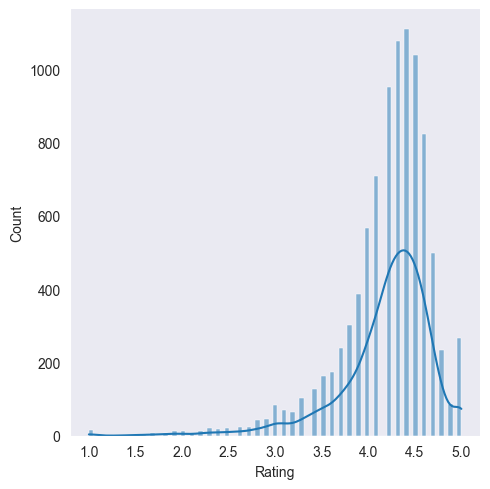

In [486]:
#Create a distribution plot for rating
dis_plot = sns.displot(data=inp3,x='Rating',kde=True)

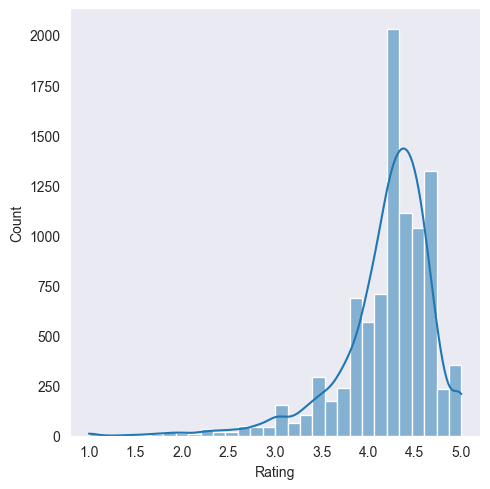

In [487]:
#Change the number of bins
dis_plot = sns.displot(data=inp3,x='Rating',bins=30,kde=True)

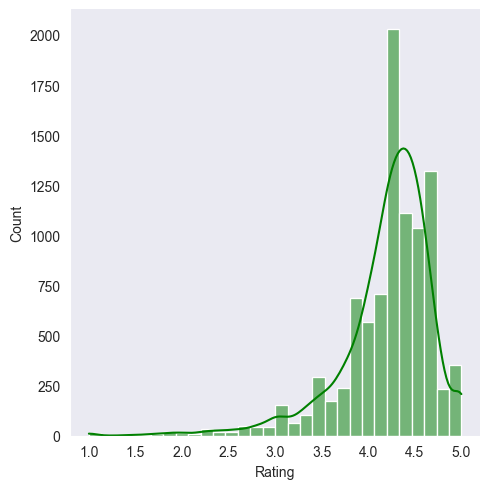

In [488]:
#Change the colour of bins to green
dis_plot = sns.displot(data=inp3, x='Rating', bins=30, kde=True, color='green')


<Figure size 1000x600 with 0 Axes>

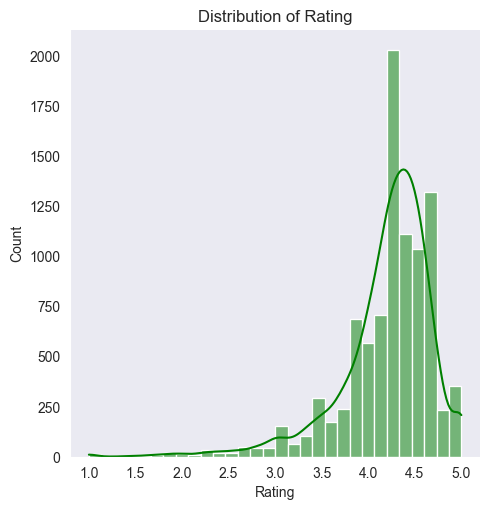

In [489]:
#Apply matplotlib functionalities
plt.figure(figsize=(10, 6)) 


dis_plot = sns.displot(data=inp3, x='Rating', bins=30, kde=True, color='green')
plt.title('Distribution of Rating')
plt.show()

#### Styling Options

One of the biggest advantages of using Seaborn is that you can retain its aesthetic properties and also the Matplotlib functionalities to perform additional customisations. Before we continue with our case study analysis, let’s study some styling options that are available in Seaborn.

-  Check out the official documentation:https://seaborn.pydata.org/generated/seaborn.set_style.html

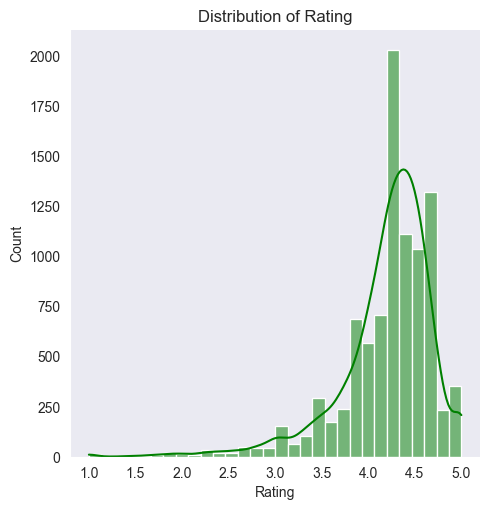

In [490]:
#Check all the styling options
dis_plot = sns.displot(data=inp3, x='Rating', bins=30, kde=True, color='green')
sns.set_style('whitegrid')
plt.title('Distribution of Rating')
plt.show()

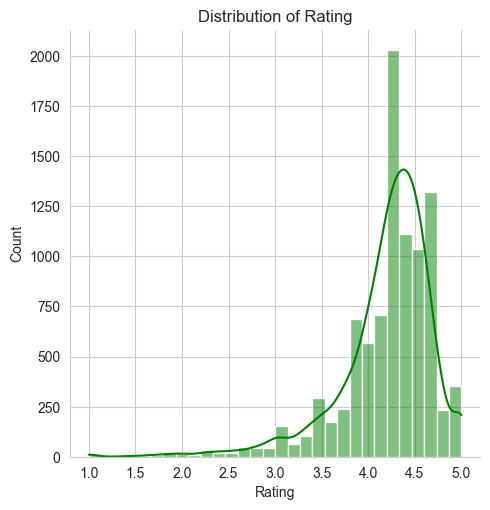

In [491]:
dis_plot = sns.displot(data=inp3, x='Rating', bins=30, kde=True, color='green')
sns.set_style('dark')
plt.title('Distribution of Rating')
plt.show()

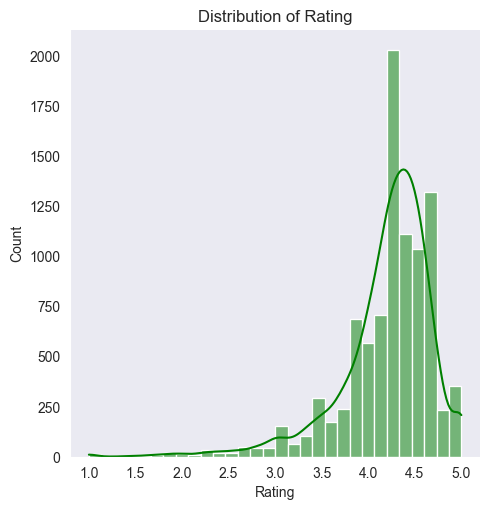

In [492]:
dis_plot = sns.displot(data=inp3, x='Rating', bins=30, kde=True, color='green')
sns.set_style('ticks')
plt.title('Distribution of Rating')
plt.show()

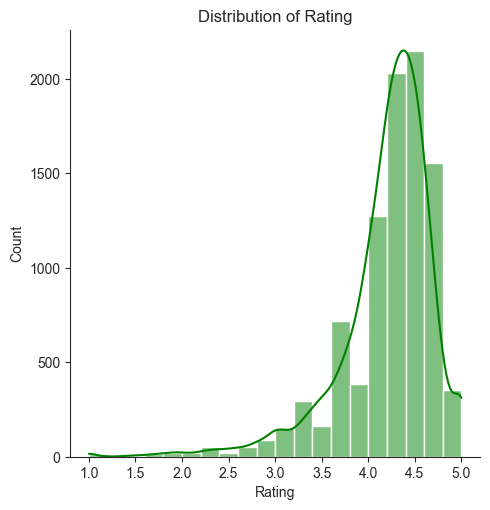

In [493]:
#Change the number of bins to 20
dis_plot = sns.displot(data=inp3, x='Rating', bins=20, kde=True, color='green')
sns.set_style('dark')
plt.title('Distribution of Rating')
plt.show()

#### Pie-Chart and Bar Chart

For analysing how a numeric variable changes across several categories of a categorical variable you utilise either a pie chart or a box plot

For example, if you want to visualise the responses of a marketing campaign, you can use the following views:

![PieChart](images\pie.png)

![barChart](images\bar.png)

- You'll be using the pandas method of plotting both a pie chart and a bar chart. Check out their official documentations:
   - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html
   - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.pie.html

In [494]:
inp3

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.000000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.000000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.000000,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.000000,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.000000,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2600.000000,500,Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.000000,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.000000,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,21516.529524,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [495]:
#Analyse the Content Rating column
inp3['Content Rating'].value_counts()

Content Rating
Everyone           7414
Teen               1083
Mature 17+          461
Everyone 10+        397
Adults only 18+       3
Unrated               1
Name: count, dtype: int64

In [496]:
#Remove the rows with values which are less represented 
inp3 = inp3[(inp3['Content Rating'] != 'Adults only 18+') & (inp3['Content Rating'] != 'Unrated') ]

In [497]:
inp3

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.000000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.000000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.000000,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.000000,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.000000,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2600.000000,500,Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.000000,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.000000,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,21516.529524,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [498]:
#Reset the index
inp3.reset_index(drop=True)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.000000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.000000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.000000,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.000000,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.000000,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9350,FR Calculator,FAMILY,4.0,7,2600.000000,500,Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
9351,Sya9a Maroc - FR,FAMILY,4.5,38,53000.000000,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
9352,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.000000,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
9353,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,21516.529524,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [499]:
#Check the apps belonging to different categories of Content Rating 
total_apps = inp3.groupby(by='Content Rating').size().reset_index(name= "The number of apps")
total_apps

,Content Rating,The number of apps
0,Everyone,7414
1,Everyone 10+,397
2,Mature 17+,461
3,Teen,1083


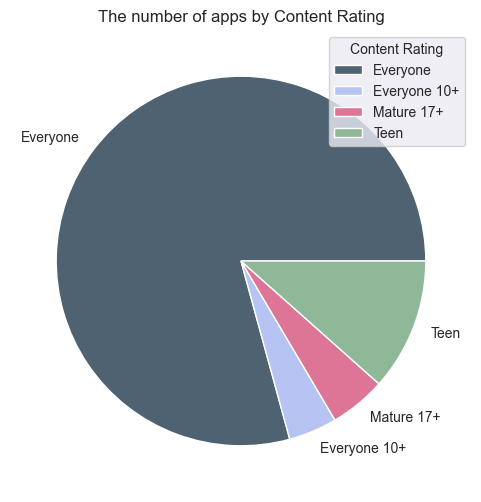

In [548]:
#Plot a pie chart
colors = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897']
plt.figure(figsize=(6,6))
pie = plt.pie(total_apps['The number of apps'],labels=total_apps['Content Rating'],colors=colors)
plt.title('The number of apps by Content Rating')
plt.legend(title='Content Rating', loc='upper right')
plt.show()

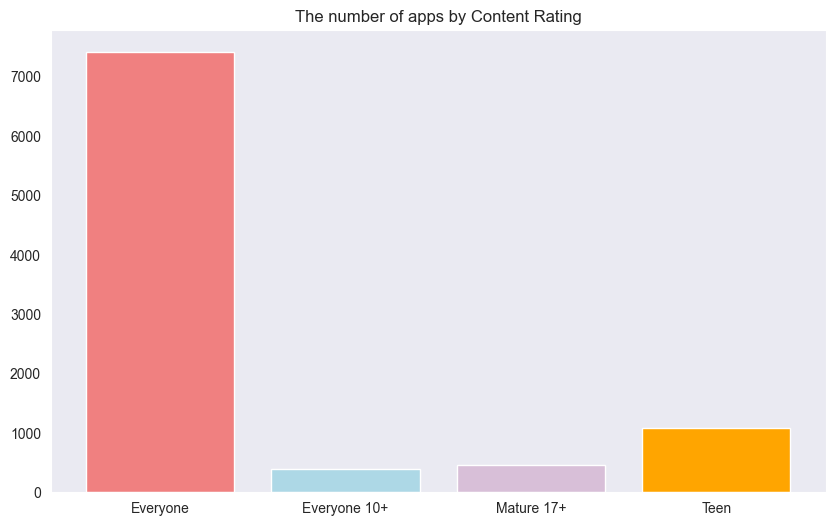

In [501]:
#Plot a bar chart
plt.figure(figsize=(10,6))
bar1 = plt.bar(total_apps['Content Rating'],total_apps['The number of apps'],color=['lightcoral','lightblue','thistle','orange'])
plt.title('The number of apps by Content Rating')
plt.show()

In [502]:
#Question - Plot a bar plot for checking the 4th highest Android version type
total_ver = inp3.groupby('Android Ver').size().reset_index(name= 'total of version')
total_ver = total_ver.sort_values(by='total of version',ascending=False).head(4)
total_ver

,Android Ver,total of version
16,4.1 and up,2059
30,Varies with device,1317
14,4.0.3 and up,1239
12,4.0 and up,1130


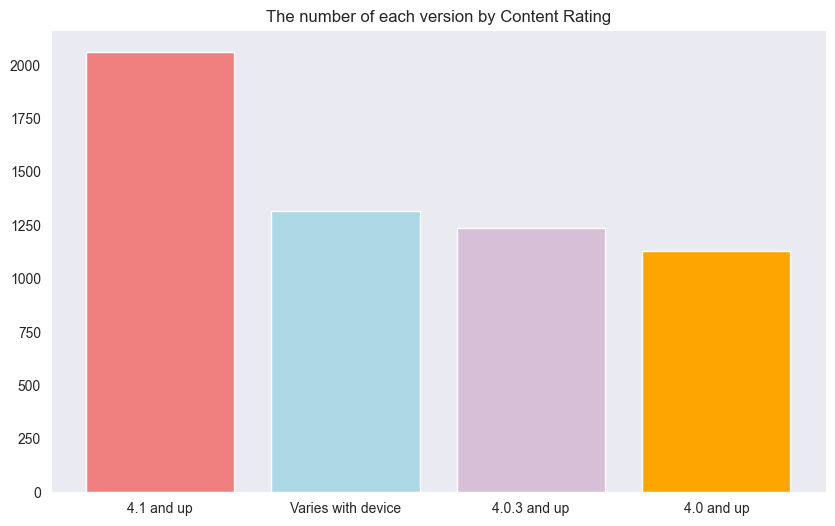

In [503]:
plt.figure(figsize=(10,6))
bar2 = plt.bar(total_ver['Android Ver'],total_ver['total of version'],color=['lightcoral','lightblue','thistle','orange'])
plt.title('The number of each version by Content Rating')
plt.show()

#### Scatter Plots

Scatterplots are perhaps one of the most commonly used as well one of the most powerful visualisations you can use in the field of machine learning. They are pretty crucial in revealing relationships between the data points and you can generally deduce some sort of trends in the data with the help of a scatter plot. 

![Scatterplot](images\scatter.png)

- They're pretty useful in regression problems to check whether a linear trend exists in the data or not. For example, in the image below, creating a linear model in the first case makes far more sense since a clear straight line trend is visible.

![Scatterplot-Reg](images\regression3.png)

- Also, they help in observing __naturally occuring clusters__. In the following image, the marks of students in Maths and Biology has been plotted.You can clearly group the students to 4 clusters now. Cluster 1 are students who score very well in Biology but very poorly in Maths, Cluster 2 are students who score equally well in both the subjects and so on.

![Scatter-Clusters](images\Clusters.png)

**Note**: You'll be studying about both Regression and Clustering in greater detail in the machine learning modules

You'll be using **sns.jointplot()** for creating a scatter plot. Check out its documentation:
https://seaborn.pydata.org/generated/seaborn.jointplot.html

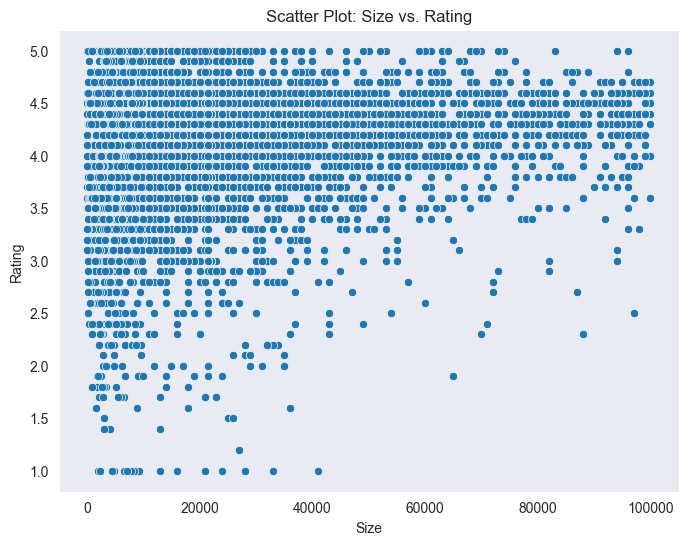

In [504]:
###Size vs Rating

##Plot a scatter-plot in the matplotlib way between Size and Rating
plt.figure(figsize=(8,6))
scatter = sns.scatterplot(
    x = 'Size',
    y = 'Rating',
    data = inp3
)
plt.xlabel('Size')
plt.ylabel('Rating')
plt.title('Scatter Plot: Size vs. Rating')
plt.show()

<Figure size 2000x2000 with 0 Axes>

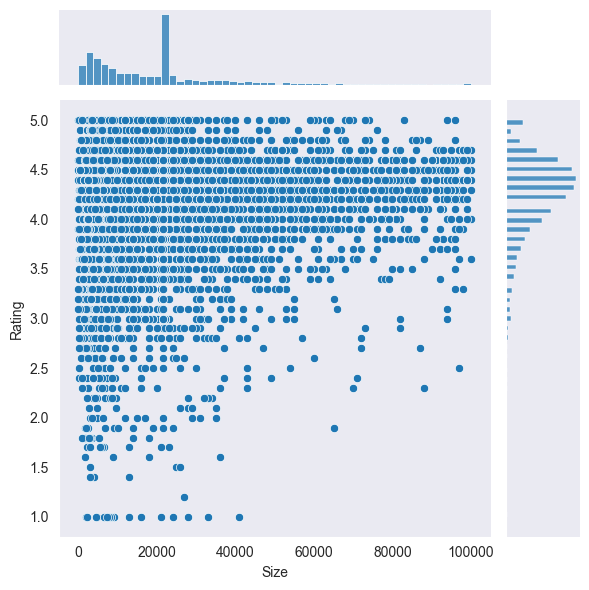

In [505]:
### Plot the same thing now using a jointplot
plt.figure(figsize=(20,20))
scatter2 = sns.jointplot(
    x = 'Size',
    y = 'Rating',
    data = inp3
)
plt.xlabel('Size')
plt.ylabel('Rating')
plt.show()

<Figure size 2000x2000 with 0 Axes>

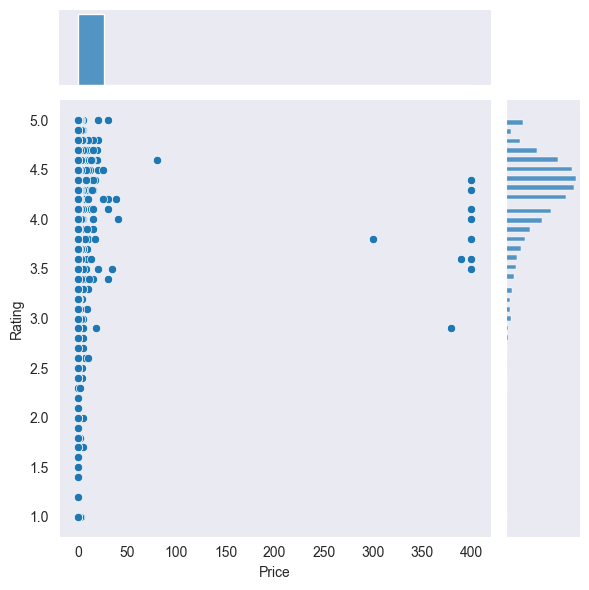

In [506]:
## Plot a jointplot for Price and Rating
plt.figure(figsize=(20,20))
scatter3 = sns.jointplot(
    x = 'Price',
    y = 'Rating',
    data = inp3
)
plt.xlabel('Price')
plt.ylabel('Rating')
plt.show()

**Reg Plots**

- These are an extension to the jointplots, where a regression line is added to the view 

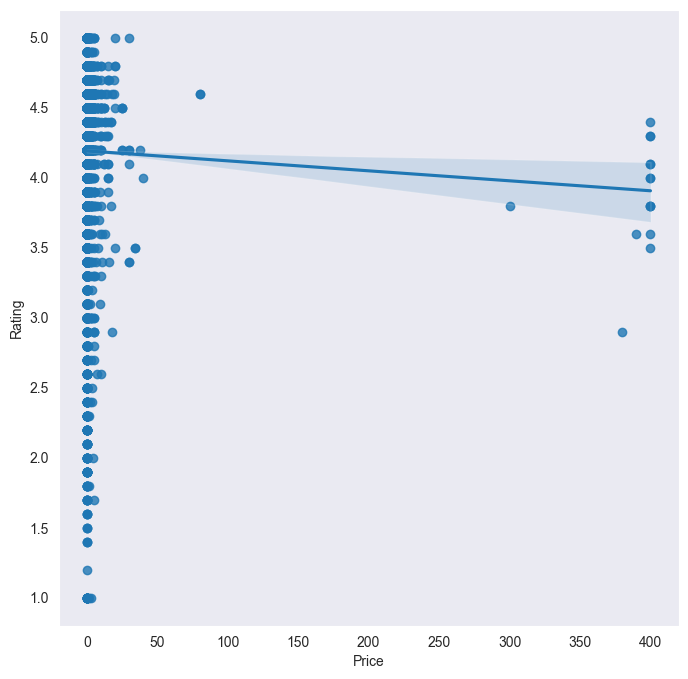

In [507]:
##Plot a reg plot for Price and Rating and observe the trend
plt.figure(figsize=(8,8))
regplot = sns.regplot(
    x = 'Price',
    y = 'Rating',
    data = inp3,
    scatter=True,
    fit_reg=True
)
plt.xlabel('Price')
plt.ylabel('Rating')
plt.show()


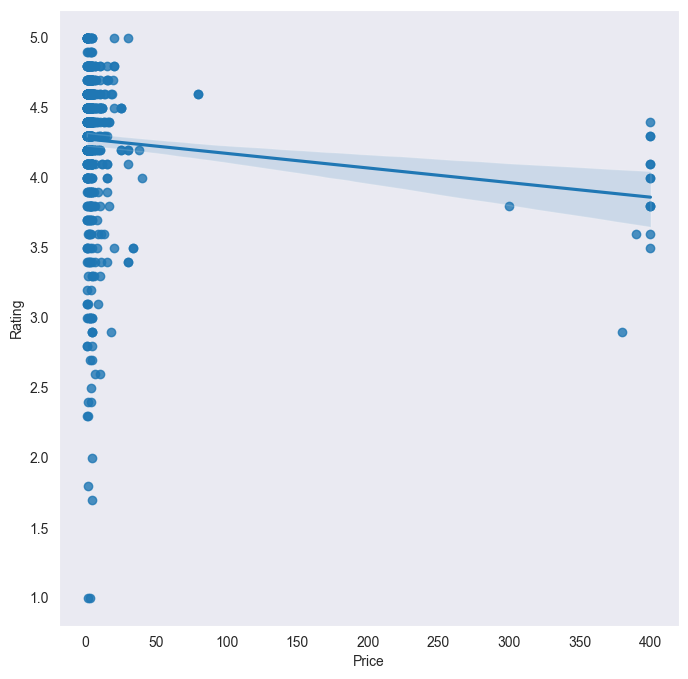

In [508]:
## Question - Plot a reg plot for Price and Rating again for only the paid apps.
plt.figure(figsize=(8,8))
regplot2 = sns.regplot(
    x = 'Price',
    y = 'Rating',
    data = inp3[inp3['Type']=='Paid'],
    scatter=True,
    fit_reg=True
)
plt.xlabel('Price')
plt.ylabel('Rating')
plt.show()

**Pair Plots**

 - When you have several numeric variables, making multiple scatter plots becomes rather tedious. Therefore, a pair plot visualisation is preferred where all the scatter plots are in a single view in the form of a matrix
 - For the non-diagonal views, it plots a **scatter plot** between 2 numeric variables
 - For the diagonal views, it plots a **histogram**

Pair Plots help in identifying the trends between a target variable and the predictor variables pretty quickly. For example, say you want to predict how your company’s profits are affected by three different factors. In order to choose which you created a pair plot containing profits and the three different factors as the variables. Here are the scatterplots of profits vs the three variables that you obtained from the pair plot.

![Pairplots](images\pairplots2.png)

It is clearly visible that the left-most factor is the most prominently related to the profits, given how linearly scattered the points are and how randomly scattered the rest two factors are.

You'll be using **sns.pairplot()** for this visualisation. Check out its official documentation:https://seaborn.pydata.org/generated/seaborn.pairplot.html

<Figure size 1500x1500 with 0 Axes>

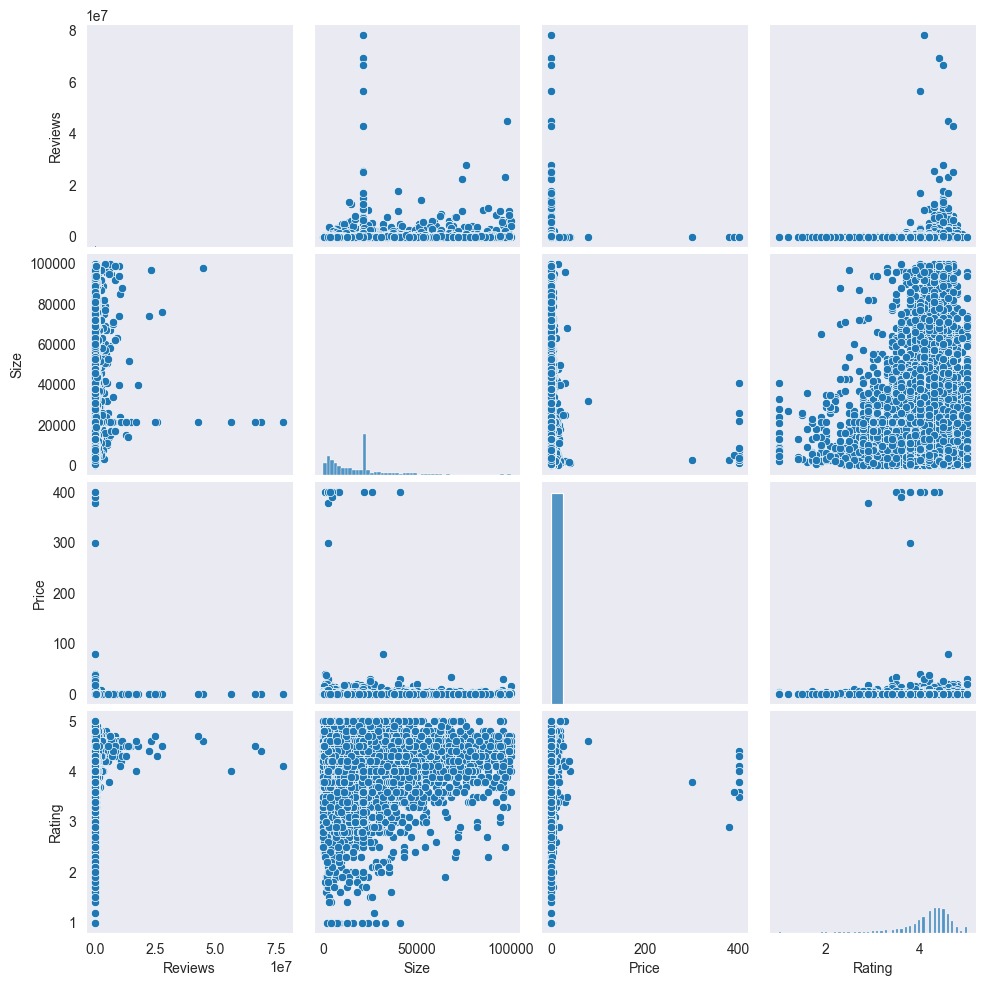

In [509]:
## Create a pair plot for Reviews, Size, Price and Rating
plt.figure(figsize=(15,15))
pair_plot = sns.pairplot(inp3[['Reviews', 'Size', 'Price', 'Rating']])

**Bar Charts Revisited**

- Here, you'll be using bar charts once again, this time using the **sns.barplot()** function. Check out its official documentation:https://seaborn.pydata.org/generated/seaborn.barplot.html
- You can modify the **estimator** parameter to change the aggregation value of your barplot

In [510]:
inp3

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.000000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.000000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.000000,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.000000,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.000000,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2600.000000,500,Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.000000,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.000000,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,21516.529524,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [511]:
##Plot a bar plot of Content Rating vs Average Rating 
avg_rating_by_content = inp3.groupby('Content Rating')['Rating'].mean().reset_index(name = 'AVG of Rating')
avg_rating_by_content

,Content Rating,AVG of Rating
0,Everyone,4.185743
1,Everyone 10+,4.257179
2,Mature 17+,4.123427
3,Teen,4.232779


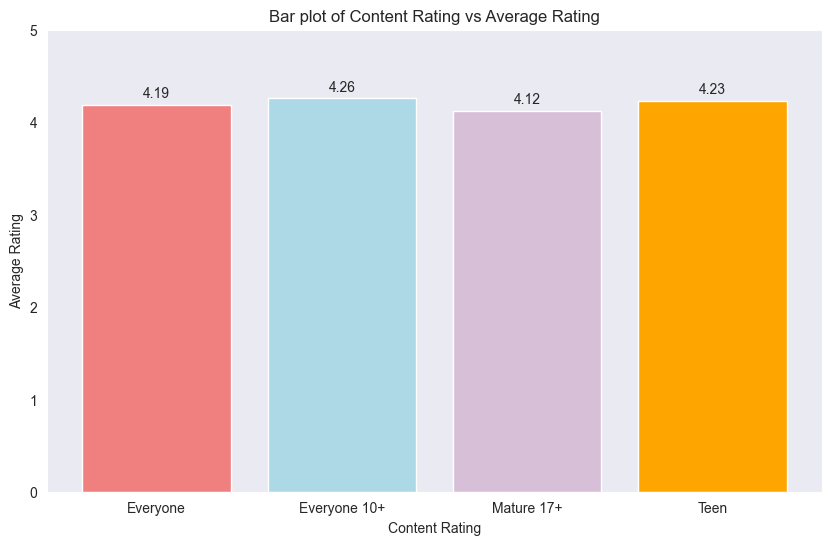

In [542]:
plt.figure(figsize=(10,6))
bar3 = plt.bar(avg_rating_by_content['Content Rating'],avg_rating_by_content['AVG of Rating'],color=['lightcoral','lightblue','thistle','orange'])
plt.title('Bar plot of Content Rating vs Average Rating')
plt.xlabel('Content Rating')
plt.ylabel('Average Rating')
plt.bar_label(bar3,labels=round(avg_rating_by_content['AVG of Rating'],2),label_type='edge',padding=3)
plt.ylim(0, 5)
plt.show()

In [513]:
##Plot the bar plot again with Median Rating
median_rating_by_content = inp3.groupby('Content Rating')['Rating'].median().reset_index(name = 'Median of Rating')
median_rating_by_content

,Content Rating,Median of Rating
0,Everyone,4.3
1,Everyone 10+,4.3
2,Mature 17+,4.2
3,Teen,4.3


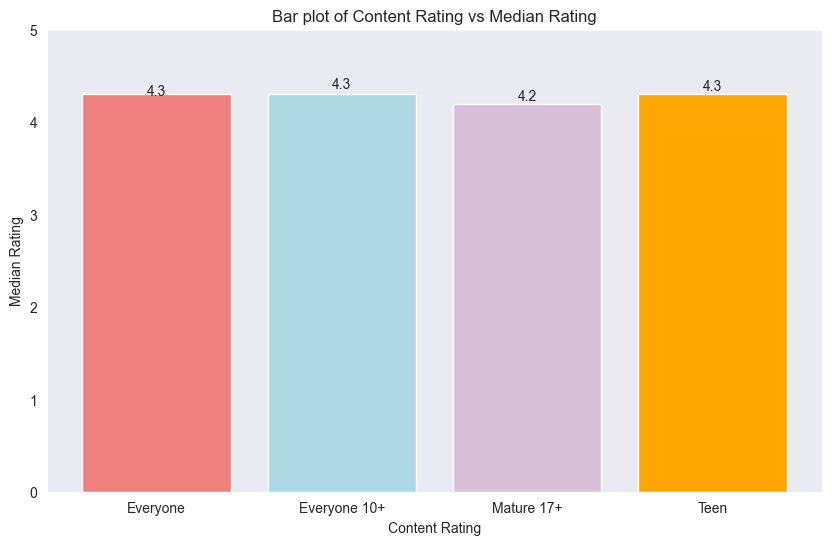

In [541]:
plt.figure(figsize=(10,6))
bar4 = plt.bar(median_rating_by_content['Content Rating'],median_rating_by_content['Median of Rating'],color=['lightcoral','lightblue','thistle','orange'])
plt.title('Bar plot of Content Rating vs Median Rating')
plt.xlabel('Content Rating')
plt.ylabel('Median Rating')
plt.bar_label(bar3,labels=median_rating_by_content['Median of Rating'],label_type='edge',padding=5)
plt.ylim(0,5)
plt.show()

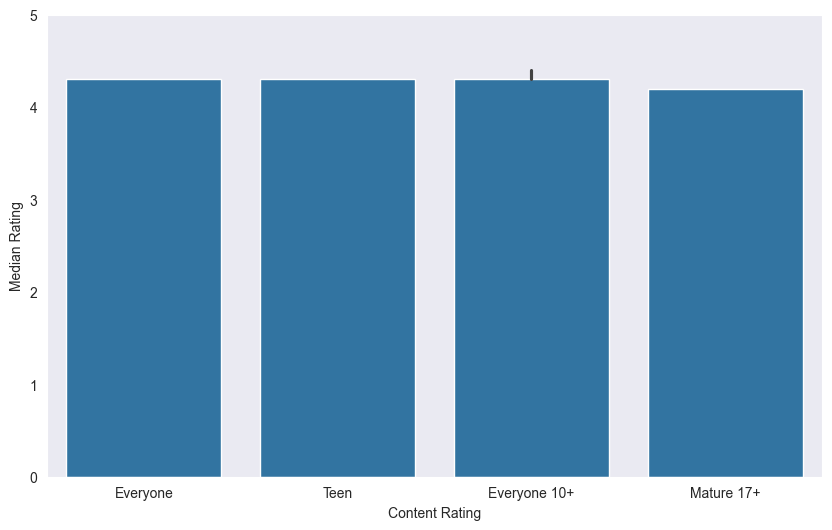

In [515]:
##Plot the above bar plot using the estimator parameter
plt.figure(figsize=(10,6))
bar5= sns.barplot(x='Content Rating',y='Rating',data=inp3,estimator=np.median)
plt.xlabel('Content Rating')
plt.ylabel('Median Rating')
plt.ylim(0,5)
plt.show()


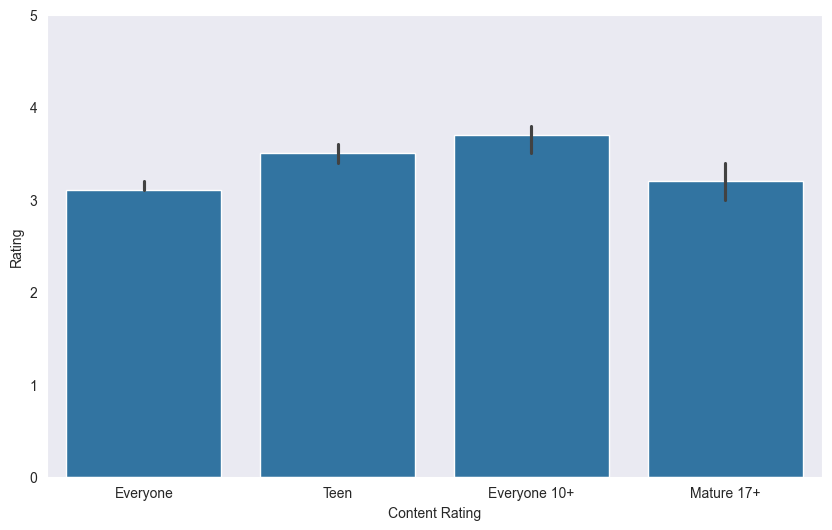

In [516]:
##Plot the bar plot with only the 5th percentile of Ratings
plt.figure(figsize=(10,6))
bar6=sns.barplot(data=inp3,x="Content Rating",y="Rating",estimator=lambda x : np.quantile(x,0.05))
plt.xlabel('Content Rating')
plt.ylabel('Rating')
plt.ylim(0,5)
plt.show()


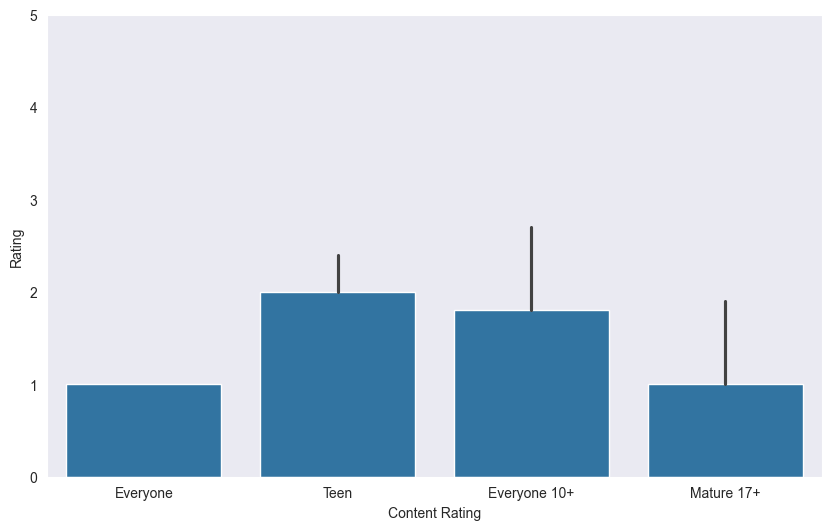

In [517]:
##Question - Plot the bar plot with the minimum Rating
plt.figure(figsize=(10,6))
bar7=sns.barplot(data=inp3,x="Content Rating",y="Rating",estimator= np.min)
plt.xlabel('Content Rating')
plt.ylabel('Rating')
plt.ylim(0,5)
plt.show()

__Box Plots Revisited__

- Apart from outlier analysis, box plots are great at comparing the spread and analysing a numerical variable across several categories
- Here you'll be using **sns.boxplot()** function to plot the visualisation. Check out its documentation: https://seaborn.pydata.org/generated/seaborn.boxplot.html




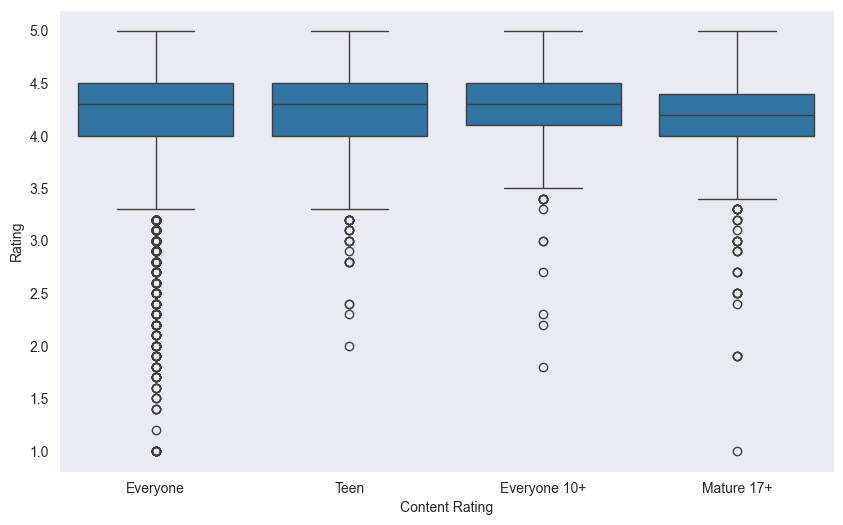

In [518]:
##Plot a box plot of Rating vs Content Rating
plt.figure(figsize=(10,6))
sns.boxplot(x = 'Content Rating',y = 'Rating',data=inp3)
plt.show()

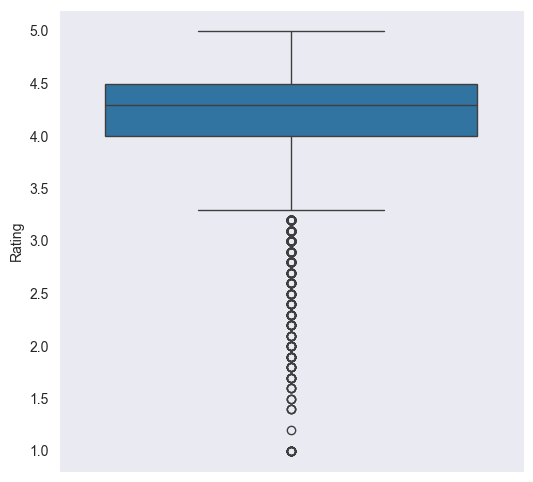

In [519]:
##Question - Plot a box plot for the Rating column only
plt.figure(figsize=(6,6))
sns.boxplot(inp3['Rating'])
plt.show()

In [520]:
##Question - Plot a box plot of Ratings across the 4 most popular Genres
count_Genres = inp3['Genres'].value_counts().reset_index()
most_popular_Genres = count_Genres.iloc[0:4,0]
most_popular_Genres 
df = inp3[inp3['Genres'].isin(most_popular_Genres )]

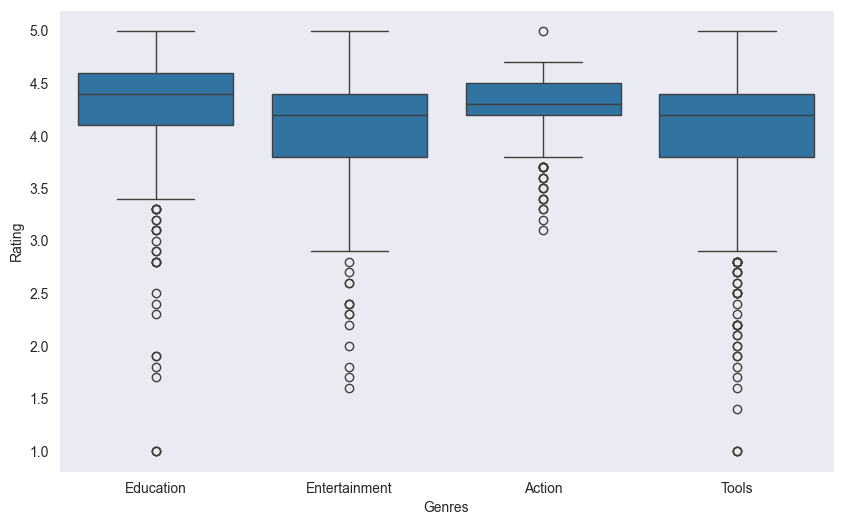

In [521]:
plt.figure(figsize=(10,6))
sns.boxplot(x = 'Genres',y = 'Rating',data=df)
plt.show()

#### Heat Maps

Heat mapsutilise the concept of using colours and colour intensities to visualise a range of values. You must have seen heat maps in cricket or football broadcasts on television to denote the players’ areas of strength and weakness.

![HeatMap](images\heatmap1.png)

- In python, you can create a heat map whenever you have a rectangular grid or table of numbers analysing any two features

![heatmap2](images\heatmap2.png)

- You'll be using **sns.heatmap()** to plot the visualisation. Checkout its official documentation :https://seaborn.pydata.org/generated/seaborn.heatmap.html

In [551]:
##Ratings vs Size vs Content Rating

##Prepare buckets for the Size column using pd.qcut
inp3['Size Buckets'] = pd.qcut(inp3['Size'],q=5,labels=['Very Small','Small','Medium','Large','Very Large'])
inp3

C:\Users\quynh\AppData\Local\Temp\ipykernel_14212\3660890859.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inp3['Size Buckets'] = pd.qcut(inp3['Size'],q=5,labels=['Very Small','Small','Medium','Large','Very Large'])


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size Buckets
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.000000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,Medium
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.000000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,Small
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.000000,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,Small
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.000000,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,Large
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.000000,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,Very Small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2600.000000,500,Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up,Very Small
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.000000,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,Very Large
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.000000,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up,Very Small
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,21516.529524,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device,Medium


In [552]:
##Create a pivot table for Size_buckets and Content Rating with values set to Rating
pt = pd.pivot_table(data=inp3,index='Content Rating',columns='Size Buckets',values='Rating',aggfunc=np.median)
pt

C:\Users\quynh\AppData\Local\Temp\ipykernel_14212\4259511168.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pt = pd.pivot_table(data=inp3,index='Content Rating',columns='Size Buckets',values='Rating',aggfunc=np.median)
C:\Users\quynh\AppData\Local\Temp\ipykernel_14212\4259511168.py:2: FutureWarning: The provided callable <function median at 0x000001DAFFE6B4C0> is currently using DataFrameGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  pt = pd.pivot_table(data=inp3,index='Content Rating',columns='Size Buckets',values='Rating',aggfunc=np.median)


Size Buckets,Very Small,Small,Medium,Large,Very Large
Content Rating,,,,,
Everyone,4.2,4.3,4.3,4.30,4.3
Everyone 10+,4.1,4.3,4.3,4.30,4.4
Mature 17+,4.3,4.2,4.2,4.20,4.2
Teen,4.3,4.3,4.3,4.25,4.3


In [524]:
##Change the aggregation to median


In [553]:
##Change the aggregation to 20th percentile
pt1 = pd.pivot_table(data=inp3,index='Content Rating',columns='Size Buckets',values='Rating',aggfunc=lambda x: np.quantile(x,0.2))
pt1

C:\Users\quynh\AppData\Local\Temp\ipykernel_14212\1815674043.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pt1 = pd.pivot_table(data=inp3,index='Content Rating',columns='Size Buckets',values='Rating',aggfunc=lambda x: np.quantile(x,0.2))


Size Buckets,Very Small,Small,Medium,Large,Very Large
Content Rating,,,,,
Everyone,3.80,3.80,4.1,3.8,4.00
Everyone 10+,3.86,4.06,4.1,4.0,4.02
Mature 17+,3.42,3.60,4.0,3.9,4.00
Teen,3.80,3.90,4.0,4.0,4.00


In [526]:
##Store the pivot table in a separate variable


<Axes: xlabel='Size Buckets', ylabel='Content Rating'>

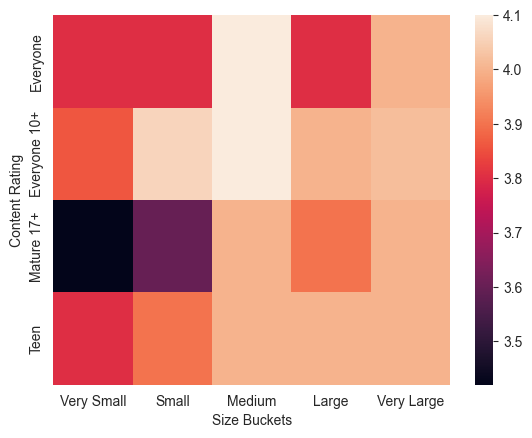

In [554]:
##Plot a heat map
sns.heatmap(pt1)

<Axes: xlabel='Size Buckets', ylabel='Content Rating'>

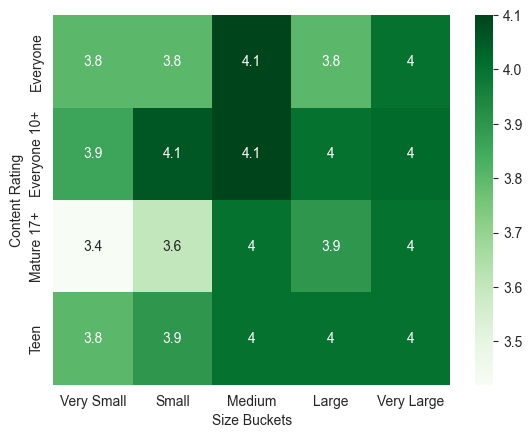

In [555]:
##Apply customisations
sns.heatmap(pt1,cmap="Greens",annot=True)

In [557]:
##Question - Replace Content Rating with Review_buckets in the above heat map
##Keep the aggregation at minimum value for Rating
inp3['Review Buckets'] = pd.qcut(inp3['Reviews'],q=5,labels=['Very Small','Small','Medium','Large','Very Large'])
inp3

C:\Users\quynh\AppData\Local\Temp\ipykernel_14212\421951226.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inp3['Review Buckets'] = pd.qcut(inp3['Reviews'],q=5,labels=['Very Small','Small','Medium','Large','Very Large'])


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size Buckets,Review Buckets
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.000000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,Medium,Small
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.000000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,Small,Small
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.000000,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,Small,Large
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.000000,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,Large,Very Large
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.000000,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,Very Small,Small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2600.000000,500,Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up,Very Small,Very Small
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.000000,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,Very Large,Very Small
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.000000,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up,Very Small,Very Small
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,21516.529524,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device,Medium,Small


In [560]:
pt2 = pd.pivot_table(data=inp3,index='Content Rating',columns='Review Buckets',values='Rating',aggfunc=lambda x: np.quantile(x,0.2))
pt2

C:\Users\quynh\AppData\Local\Temp\ipykernel_14212\467821309.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pt2 = pd.pivot_table(data=inp3,index='Content Rating',columns='Review Buckets',values='Rating',aggfunc=lambda x: np.quantile(x,0.2))


Review Buckets,Very Small,Small,Medium,Large,Very Large
Content Rating,,,,,
Everyone,3.50,3.7,3.90,4.10,4.2
Everyone 10+,3.52,3.8,3.94,4.02,4.3
Mature 17+,3.48,3.5,3.82,4.00,4.1
Teen,3.80,3.8,3.90,3.92,4.2


<Axes: xlabel='Review Buckets', ylabel='Content Rating'>

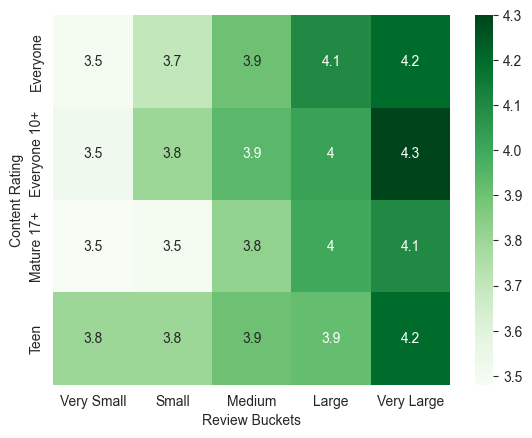

In [559]:
sns.heatmap(pt2,cmap="Greens",annot=True)

### Session 3: Additional Visualisations

#### Line Plots

- A line plot tries to observe trends using time dependent data.
-  For this part, you'll be using **pd.to_datetime()** function. Check out its documentation:https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html


In [561]:
inp3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9355 entries, 0 to 10840
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   App             9355 non-null   object  
 1   Category        9355 non-null   object  
 2   Rating          9355 non-null   float64 
 3   Reviews         9355 non-null   int64   
 4   Size            9355 non-null   float64 
 5   Installs        9355 non-null   int64   
 6   Type            9355 non-null   object  
 7   Price           9355 non-null   float64 
 8   Content Rating  9355 non-null   object  
 9   Genres          9355 non-null   object  
 10  Last Updated    9355 non-null   object  
 11  Current Ver     9355 non-null   object  
 12  Android Ver     9355 non-null   object  
 13  Size Buckets    9355 non-null   category
 14  Review Buckets  9355 non-null   category
dtypes: category(2), float64(3), int64(2), object(8)
memory usage: 1.0+ MB


In [563]:
## Extract the month from the Last Updated Date
inp3['Updated Month'] = pd.to_datetime(inp3['Last Updated']).dt.month
inp3

C:\Users\quynh\AppData\Local\Temp\ipykernel_14212\673559484.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inp3['Updated Month'] = pd.to_datetime(inp3['Last Updated']).dt.month


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size Buckets,Review Buckets,Updated Month
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.000000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,Medium,Small,1
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.000000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,Small,Small,1
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.000000,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,Small,Large,8
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.000000,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,Large,Very Large,6
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.000000,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,Very Small,Small,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2600.000000,500,Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up,Very Small,Very Small,6
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.000000,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,Very Large,Very Small,7
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.000000,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up,Very Small,Very Small,7
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,21516.529524,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device,Medium,Small,1


In [564]:
## Find the average Rating across all the months
avg_rating_by_month = inp3.groupby('Updated Month')['Rating'].mean().reset_index(name='Average Rating')
avg_rating_by_month 

,Updated Month,Average Rating
0,1,4.142892
1,2,4.094048
2,3,4.110766
3,4,4.154600
4,5,4.161031
5,6,4.184372
6,7,4.249206
7,8,4.292963
8,9,4.042636
9,10,4.016460


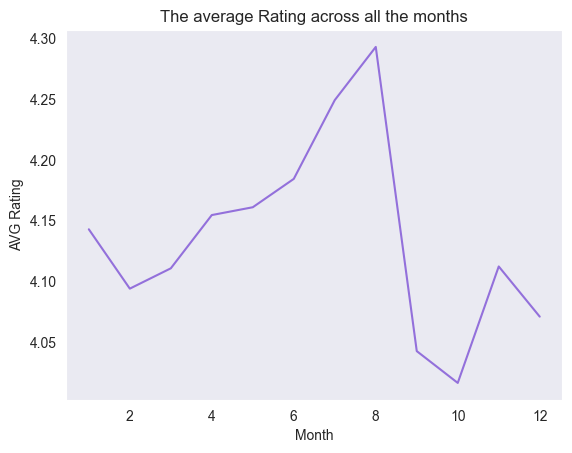

In [572]:
## Plot a line graph
plt.plot('Updated Month','Average Rating', data = avg_rating_by_month,color='mediumpurple')
plt.title('The average Rating across all the months')
plt.xlabel('Month')
plt.ylabel('AVG Rating')
plt.show()


#### Stacked Bar Charts

- A stacked bar chart breaks down each bar of the bar chart on the basis of a different category
- For example, for the Campaign Response bar chart you saw earlier, the stacked bar chart is also showing the Gender bifurcation as well

![Stacked](images\stacked.png)

In [578]:
## Create a pivot table for Content Rating and updated Month with the values set to Installs
pt3 = pd.pivot_table(data=inp3,index='Updated Month',columns='Content Rating',values='Installs',aggfunc=sum)

C:\Users\quynh\AppData\Local\Temp\ipykernel_14212\2104601742.py:2: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pt3 = pd.pivot_table(data=inp3,index='Updated Month',columns='Content Rating',values='Installs',aggfunc=sum)


In [579]:
##Store the table in a separate variable
pt3

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Updated Month,,,,
1,1025487390,105282000,9701210,44159010
2,945372005,19821000,13021500,39597710
3,1045380520,30322510,9111100,99850310
4,2593371280,23300000,5259000,271619410
5,5431097800,128173500,110140100,562689600
6,6157183505,1367727100,155257200,505716600
7,46991121780,9726556000,1739491910,15983556800
8,46490943320,1715821000,3462981700,16997855650
9,410340410,24931100,2201010,22483100


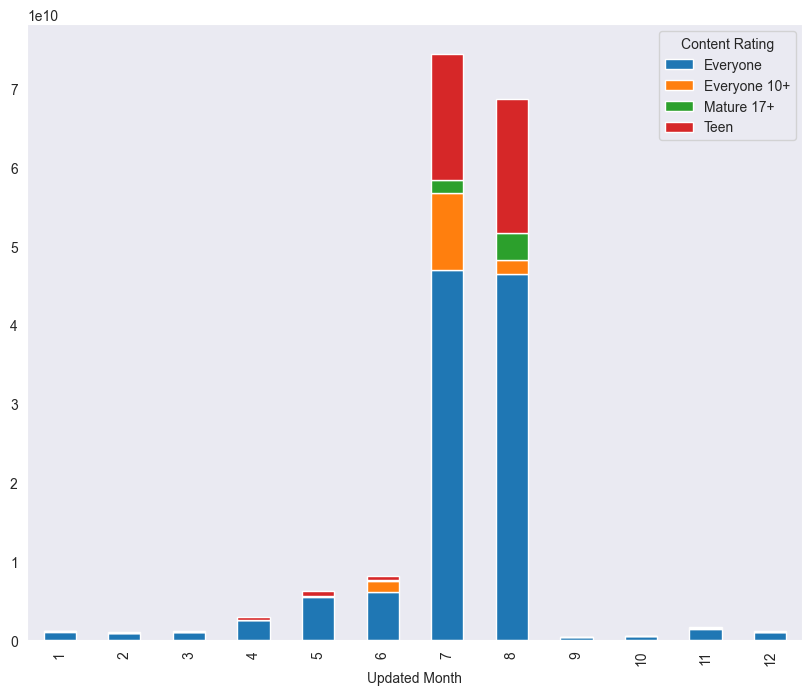

In [582]:
##Plot the stacked bar chart.
pt3.plot(kind='bar',stacked=True,figsize=[10,8])
plt.show()

<Axes: xlabel='Updated Month'>

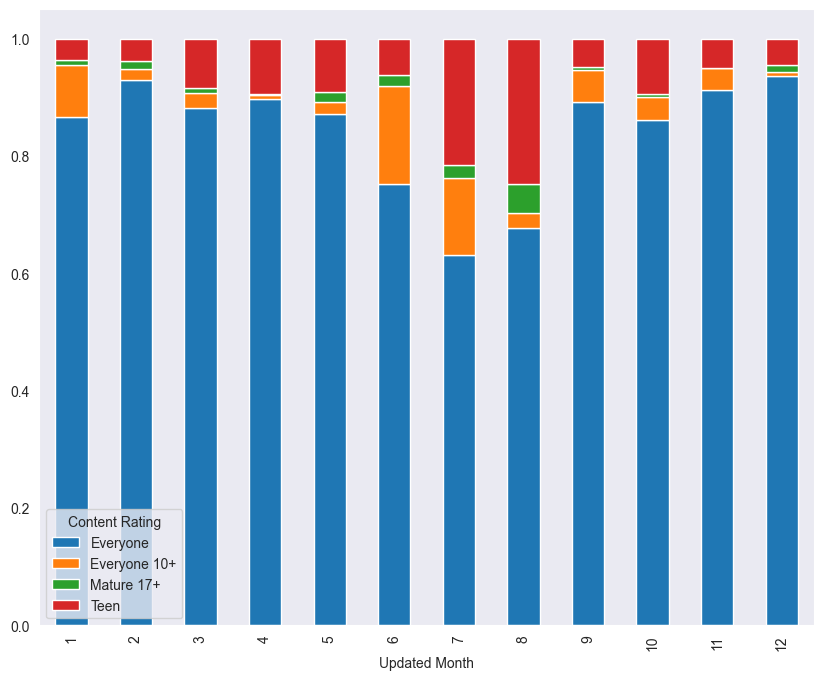

In [584]:
##Plot the stacked bar chart again wrt to the proportions.
pt3_normalized = pt3.div(pt3.sum(axis=1), axis=0)
pt3_normalized.plot(kind='bar', stacked=True, figsize=[10, 8])


#### Plotly

Plotly is a Python library used for creating interactive visual charts. You can take a look at how you can use it to create aesthetic looking plots with a lot of user-friendly functionalities like hover, zoom, etc.

Check out this link for installation and documentation:https://plot.ly/python/getting-started/

In [588]:
#Install plotly
! pip install plotly

In [589]:
#Take the table you want to plot in a separate variable
avg_rating_by_month 

,Updated Month,Average Rating
0,1,4.142892
1,2,4.094048
2,3,4.110766
3,4,4.154600
4,5,4.161031
5,6,4.184372
6,7,4.249206
7,8,4.292963
8,9,4.042636
9,10,4.016460


In [590]:
#Import the plotly libraries
import plotly.express as px

In [592]:
#Prepare the plot
chart = px.line(avg_rating_by_month,x='Updated Month',y='Average Rating',title='Monthly average rating')
chart.show()